<a href="https://colab.research.google.com/github/Arathi1996-P/ML-and-DEEP-LEARNING/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
import keras
from keras.layers import Dense, SimpleRNN

from sklearn.model_selection import train_test_split

**Generate a simple dataset in time series**

In [ ]:
N=1000
Tp=800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.220021
1,1.460927
2,1.882847
3,0.550763
4,1.674462


**PLOT**

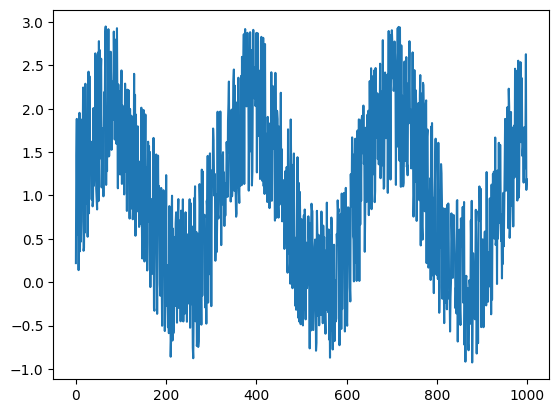

In [ ]:
plt.plot(df)
plt.show()

We craeted a sinasoidal data set so we hav got a sine wave plot.

**Split the dataset into train and test parts**

In [ ]:
values=df.values
train,test = values[0:Tp,:],values[Tp:N,:]

: represent thecstep it is just the improvement from one step to another.
0=Start, Tp = 800, N=1000

**Add step elements**

In [ ]:
step = 4
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

The data is a sine wave  of the time series which have to be converted to matrix form to be processed.

Here since it is sequential data each step is related to the previous step and te previous step is appended to fed the next one.

**Convert training and testing dataseet in to matrix**

In [ ]:
import tensorflow as tf

In [ ]:
def ConvertTOMatrix(data,step):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
    return np.array(X),np.array(Y)

    X_train,Y_train = ConvertTOMatrix(train,step)
    X_test,Y_test= ConvertTOMatrix(test,step)

**Building a model**

In [ ]:
model =Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


This model uses relu activation to support the previous dense layer in the particular steps of this simpleRNN model. use rms optimizer since we have asine wave as dataset.